# Initial Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# original matrix
ratings_df = pd.read_csv("data/rating_matrix.csv")
ratings_df

,userId,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,1,NaN,NaN,NaN,NaN,0.219,NaN,-9.281,-9.281,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,-9.688,NaN,9.938,9.531,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,-9.844,NaN,-9.844,-7.219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,-5.812,NaN,-4.500,-4.906,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,6.906,NaN,4.750,-5.906,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59127,63974,NaN,NaN,NaN,NaN,NaN,NaN,-4.438,1.531,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59128,63975,NaN,NaN,NaN,NaN,NaN,NaN,0.625,4.531,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59129,63976,NaN,NaN,NaN,NaN,NaN,NaN,-7.250,4.562,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59130,63977,NaN,NaN,NaN,NaN,NaN,NaN,-8.531,-8.438,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## None values

In [3]:
total_nans = ratings_df.iloc[:, 1:].isna().sum().sum()
print(f"Total NaN values in matrix: {total_nans}")

Total NaN values in matrix: 7108361


In [4]:
total_cells = (len(ratings_df) * len(ratings_df.columns[1:]))
missing_percentage = (total_nans / total_cells) * 100

print(f"\nPercentage of missing ratings: {missing_percentage:.2f}%")


Percentage of missing ratings: 80.14%


In [5]:


def plot_rating_distributions(ratings_df):
    """
    Plots the distribution of filled ratings for users and jokes.
    
    Args:
        ratings_df: DataFrame with userId as first column and jokes as other columns
    """
    plt.figure(figsize=(14, 6))
    
    # User distribution (left plot)
    user_counts = ratings_df.iloc[:, 1:].count(axis=1)
    plt.subplot(1, 2, 1)
    sns.histplot(user_counts, bins=30, kde=True)
    plt.title('Ratings per User Distribution')
    plt.xlabel('Number of Ratings Given')
    plt.ylabel('Number of Users')
    
    # Joke distribution (right plot)
    joke_counts = ratings_df.iloc[:, 1:].count(axis=0)
    plt.subplot(1, 2, 2)
    sns.histplot(joke_counts, bins=30, kde=True, color='orange')
    plt.title('Ratings per Joke Distribution')
    plt.xlabel('Number of Ratings Received')
    plt.ylabel('Number of Jokes')
    
    plt.tight_layout()
    plt.show()

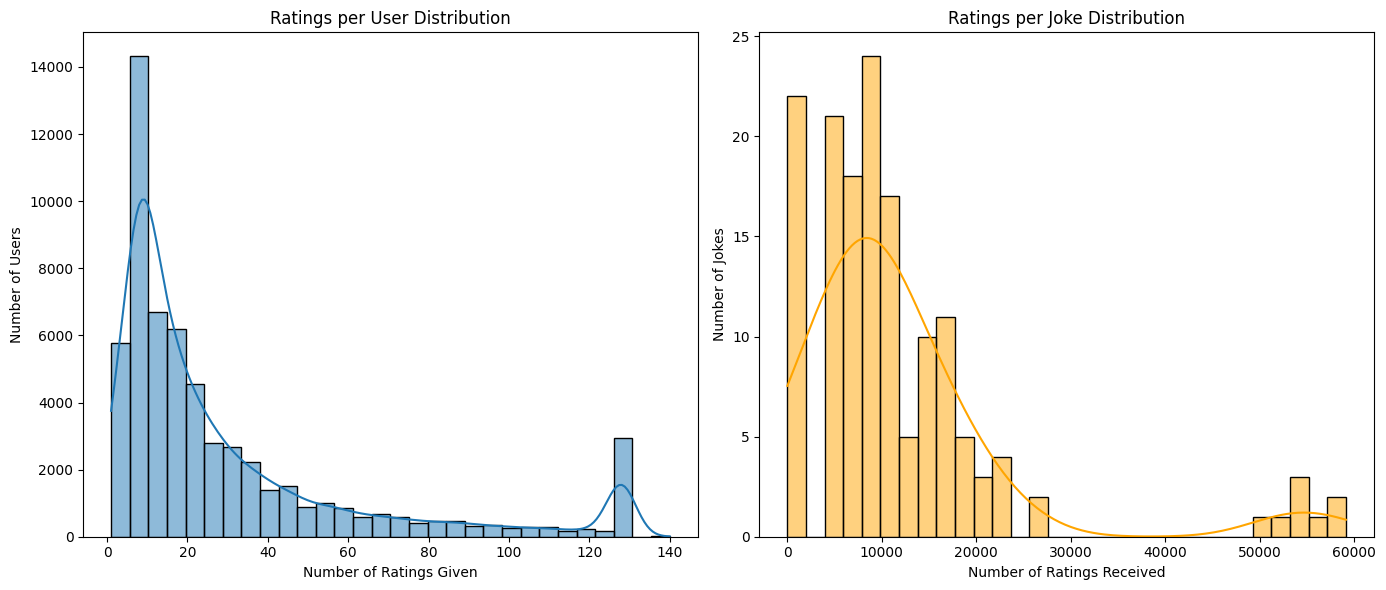

In [6]:
plot_rating_distributions(ratings_df)

In [7]:
def filter_by_rating_count(ratings_df, user_threshold=0, joke_threshold=0):
    """
    Filters users and jokes based on minimum number of ratings.
    
    Args:
        ratings_df: Input DataFrame with userId column and joke columns
        user_threshold: Minimum number of ratings a user must have
        joke_threshold: Minimum number of ratings a joke must have
    
    Returns:
        Tuple of (filtered_df, active_users_df, popular_jokes_df)
    """
    # Calculate rating counts
    user_counts = ratings_df.iloc[:, 1:].count(axis=1)
    joke_counts = ratings_df.iloc[:, 1:].count(axis=0)
    
    # Filter users
    active_users = ratings_df[user_counts >= user_threshold].copy()
    active_users_df = pd.DataFrame({
        'userId': active_users['userId'],
        'rating_count': user_counts[user_counts >= user_threshold]
    })
    
    # Filter jokes
    popular_jokes = joke_counts[joke_counts >= joke_threshold]
    popular_jokes_df = pd.DataFrame({
        'jokeId': popular_jokes.index,
        'rating_count': popular_jokes.values
    })
    
    # Filter original dataframe
    filtered_df = ratings_df[
        ratings_df['userId'].isin(active_users['userId'])
    ].copy()
    filtered_df = filtered_df[['userId'] + list(popular_jokes.index)]
    
    return filtered_df, active_users_df, popular_jokes_df

Necesarry to set the threshold properly

In [8]:
_, active_users_df, popular_jokes_df = filter_by_rating_count(ratings_df, user_threshold=30, joke_threshold=10000)


In [9]:
active_users_df

,userId,rating_count
0,1,62
1,2,34
4,5,82
6,7,46
7,8,99
...,...,...
59106,63947,68
59107,63949,128
59108,63950,128
59109,63951,32


In [10]:
popular_jokes_df

,jokeId,rating_count
0,7,59122
1,8,57720
2,13,56333
3,15,54932
4,16,54150
...,...,...
60,143,14583
61,145,12534
62,148,14988
63,149,10969


# Ratings

In [11]:
def analyze_users(ratings_df):
    """
    Analyze user statistics from the rating matrix.
    
    Args:
        ratings_df: DataFrame with userId as first column and jokes as other columns
    
    Returns:
        DataFrame with user statistics (mean, count, std, min, max, median)
    """

    rating_columns = ratings_df.columns[1:]
    
    user_stats = pd.DataFrame({
        'userId': ratings_df['userId'],
        'mean_rating': ratings_df[rating_columns].mean(axis=1, skipna=True),
        'rating_count': ratings_df[rating_columns].count(axis=1),
        'std_rating': ratings_df[rating_columns].std(axis=1, skipna=True),
        'min_rating': ratings_df[rating_columns].min(axis=1, skipna=True),
        'max_rating': ratings_df[rating_columns].max(axis=1, skipna=True),
        'median_rating': ratings_df[rating_columns].median(axis=1, skipna=True)
    })
    
    return user_stats

def analyze_jokes(ratings_df):
    """
    Analyze joke statistics from the rating matrix.
    
    Args:
        ratings_df: DataFrame with userId as first column and jokes as other columns
    
    Returns:
        DataFrame with joke statistics (mean, count, std, min, max, median)
    """

    joke_stats = pd.DataFrame({
        'jokeId': ratings_df.columns[1:],
        'mean_rating': ratings_df.iloc[:, 1:].mean(axis=0, skipna=True),
        'rating_count': ratings_df.iloc[:, 1:].count(axis=0),
        'std_rating': ratings_df.iloc[:, 1:].std(axis=0, skipna=True),
        'min_rating': ratings_df.iloc[:, 1:].min(axis=0, skipna=True),
        'max_rating': ratings_df.iloc[:, 1:].max(axis=0, skipna=True),
        'median_rating': ratings_df.iloc[:, 1:].median(axis=0, skipna=True)
    })
    
    return joke_stats

In [12]:
user_stats = analyze_users(ratings_df)
jokes_stats = analyze_jokes(ratings_df)


In [13]:
user_stats.head(15)

,userId,mean_rating,rating_count,std_rating,min_rating,max_rating,median_rating
0,1,2.094694,62,6.702183,-9.656,9.906,1.4375
1,2,3.739029,34,6.399357,-9.688,9.938,4.8750
2,3,-6.817667,18,4.432632,-9.969,1.250,-9.7965
3,4,-5.072667,3,0.671691,-5.812,-4.500,-4.9060
4,5,2.600195,82,3.075130,-7.906,8.000,2.7810
5,6,-2.206037,27,6.703893,-9.438,8.406,-5.0940
6,7,0.981022,46,1.322126,-2.906,4.188,1.1560
7,8,1.805525,99,3.476067,-7.438,8.781,1.2810
8,9,5.552133,15,7.153279,-9.531,9.750,8.8440
9,10,1.812212,104,3.409949,-6.312,9.531,1.4375


In [14]:
jokes_stats.nlargest(15, 'mean_rating')


,jokeId,mean_rating,rating_count,std_rating,min_rating,max_rating,median_rating
53,53,3.714381,23102,4.371224,-10.0,10.0,4.344
105,105,3.711223,21822,4.323487,-10.0,10.0,4.250
89,89,3.606506,25996,4.665436,-10.0,10.0,4.344
129,129,3.583496,19509,4.674796,-10.0,10.0,4.281
35,35,3.560305,20524,4.561089,-10.0,10.0,4.188
72,72,3.505712,19421,4.356456,-10.0,10.0,4.000
32,32,3.504739,22519,4.449722,-10.0,10.0,4.062
104,104,3.422796,19793,4.283718,-10.0,10.0,3.844
68,68,3.387269,15630,4.521001,-10.0,10.0,3.922
106,106,3.337933,22253,4.657860,-10.0,10.0,3.969


In [15]:
def plot_metric_histogram(stats_df, metric_col, title=None, bins=30, color='skyblue'):
    """
    Plots histogram of a specific metric from user/joke statistics.
    
    Args:
        stats_df: DataFrame containing the statistics (from analyze_users() or analyze_jokes())
        metric_col: Column name to plot (e.g., 'mean_rating', 'rating_count')
        title: Custom title for the plot
        bins: Number of bins for histogram
        color: Color for the histogram bars
    """
    if title is None:
        title = f'Distribution of {metric_col.replace("_", " ").title()}'
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data=stats_df, x=metric_col, bins=bins, color=color, kde=True)
    
    plt.title(title)
    plt.xlabel(metric_col.replace("_", " ").title())
    plt.ylabel('Frequency')
    
    mean_val = stats_df[metric_col].mean()
    median_val = stats_df[metric_col].median()
    
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    plt.legend()
    
    plt.show()

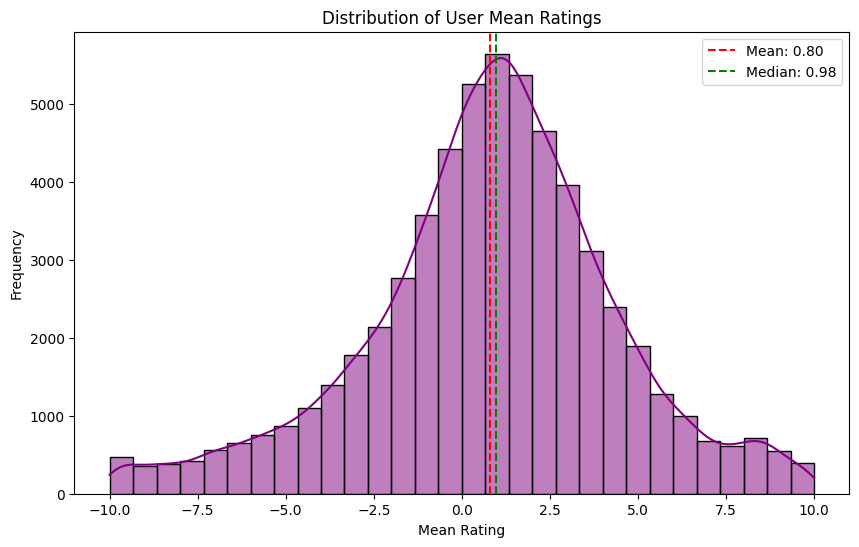

In [16]:
plot_metric_histogram(user_stats, 'mean_rating', 
                     title='Distribution of User Mean Ratings',
                     color='purple')

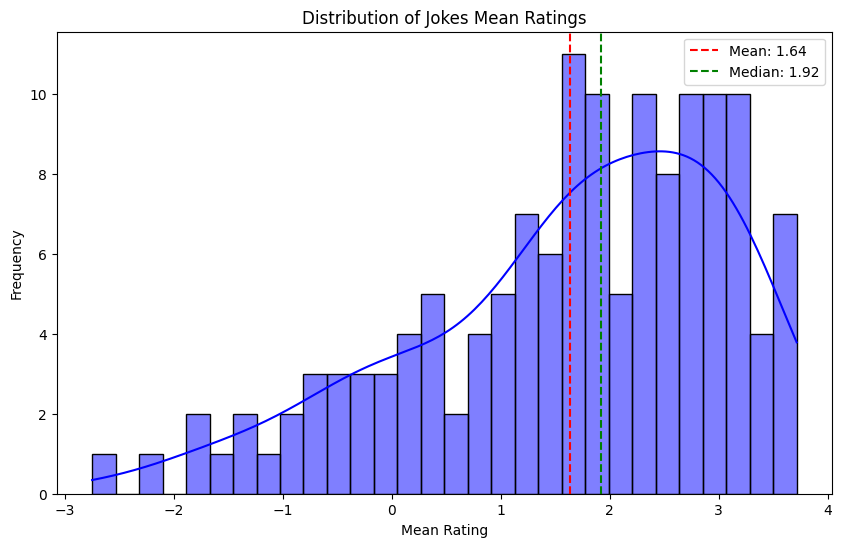

In [17]:
plot_metric_histogram(jokes_stats, 'mean_rating', 
                     title='Distribution of Jokes Mean Ratings',
                     color='blue')

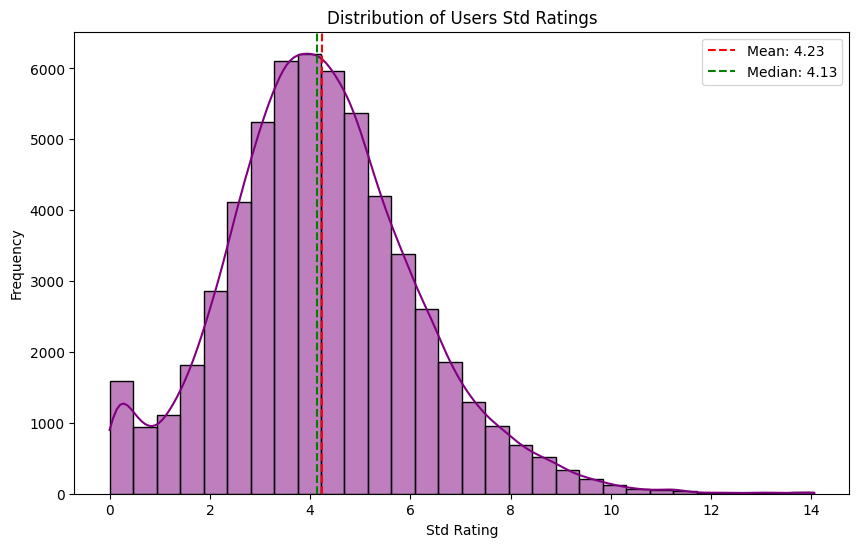

In [18]:
plot_metric_histogram(user_stats, 'std_rating', 
                     title='Distribution of Users Std Ratings',
                     color='purple')

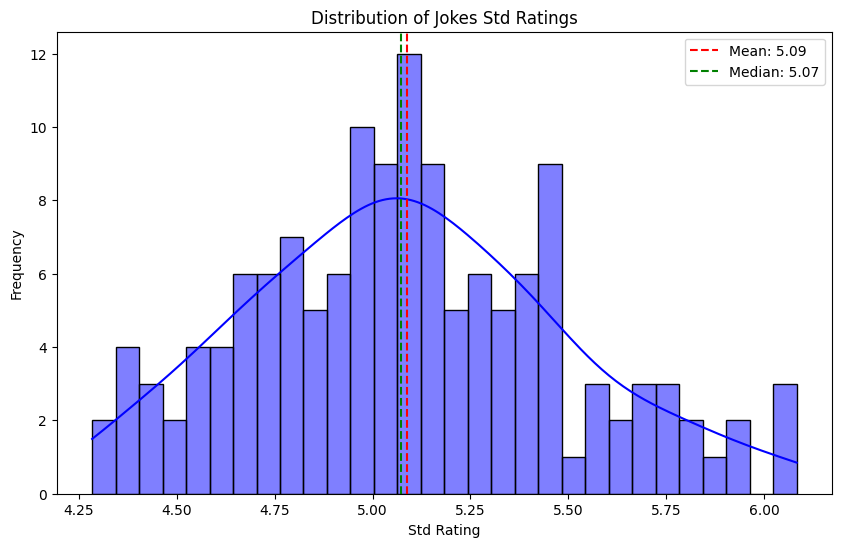

In [19]:
plot_metric_histogram(jokes_stats, 'std_rating', 
                     title='Distribution of Jokes Std Ratings',
                     color='blue')

In [20]:
ratings_df

,userId,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,1,NaN,NaN,NaN,NaN,0.219,NaN,-9.281,-9.281,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,-9.688,NaN,9.938,9.531,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,-9.844,NaN,-9.844,-7.219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,-5.812,NaN,-4.500,-4.906,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,6.906,NaN,4.750,-5.906,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59127,63974,NaN,NaN,NaN,NaN,NaN,NaN,-4.438,1.531,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59128,63975,NaN,NaN,NaN,NaN,NaN,NaN,0.625,4.531,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59129,63976,NaN,NaN,NaN,NaN,NaN,NaN,-7.250,4.562,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59130,63977,NaN,NaN,NaN,NaN,NaN,NaN,-8.531,-8.438,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Histogram for each rating

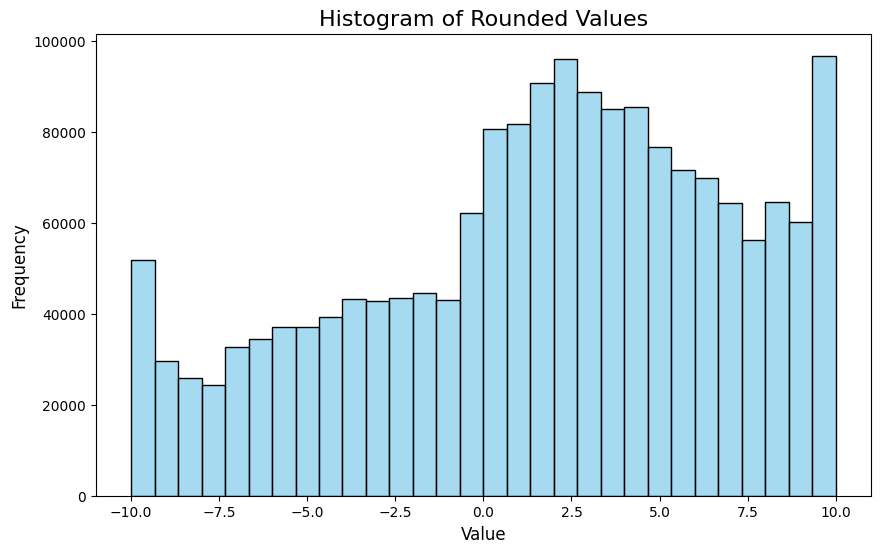

In [21]:
values = ratings_df.drop(columns=['userId']).values.flatten()
values = values[~np.isnan(values)]
data = pd.DataFrame(values, columns=['Value'])

plt.figure(figsize=(10, 6))
sns.histplot(data['Value'], kde=False, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Rounded Values', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


### Joke Recommendation

#### collaborative

In [22]:
import numpy as np
import pandas as pd
import json
from sklearn.metrics.pairwise import cosine_similarity

class SVDRecommender:
    def __init__(self, u_path, v_path, ratings_path, retraining_patience):
        self.V = np.loadtxt(v_path, delimiter=',')
        self.U = np.loadtxt(u_path, delimiter=',')

        self.R = np.loadtxt(ratings_path, delimiter=',')

        self.ratings_since_training = {}
        self.retraining_patience = retraining_patience

        # jokes = pd.read_csv("data/jester_items.csv")
        # self.jokes = jokes[~jokes["jokeId"].isin([1,2,3,4,6,9,10,11,12,14])].reset_index(drop=True)

    def seen_jokes(self, user_id):
        if user_id == -1: # unknown user
            return []

        seen = np.where(~np.isnan(self.R[user_id]))[0]
        return seen

    def overall_top_k(self, user_id, k):
        jokes_sorted = np.nanmean(self.R, axis=0).argsort()[::-1]
        seen = self.seen_jokes(user_id)
        jokes_filtered = jokes_sorted[~np.isin(jokes_sorted, seen)][:k]

        # for idx in jokes_filtered:
            # print(f"Joke {idx} - score {np.nanmean(self.R[:,idx])}: {self.jokes.iloc[idx]['jokeText']}")
        
        return jokes_filtered

    def recommend(self, user_id, k):
        seen = self.seen_jokes(user_id)

        if len(seen) <= 5:
            top = self.overall_top_k(user_id, k)
            return top

        preds = np.dot(self.V, self.U[user_id]).argsort()[::-1]
        top_k_filtered = preds[~np.isin(preds, seen)][:k]

        # for idx in top_k_filtered:
            # print(self.jokes.iloc[idx]["jokeText"])

        return top_k_filtered

    def recommend_weighted_mean(self, user_id, k):
        if len(self.seen_jokes(user_id)) <= 5:
            top = self.overall_top_k(user_id, k)
            return top

        seen = self.seen_jokes(user_id)
        print(f"Seen: {seen}")
        ratings = self.R[user_id][seen]

        similarities = cosine_similarity(self.V[seen], self.V)
        weighted_similarities = similarities * ratings[:, None]
        summed_similarities = np.sum(weighted_similarities, axis=0)
        similarities_indices = summed_similarities.argsort()[::-1]
        similarities_filtered = similarities_indices[~np.isin(similarities_indices, seen)][:k]

        # for idx in similarities_filtered:
            # print(f"Joke {idx} - score {summed_similarities[idx]}: {self.jokes.iloc[idx]['jokeText']}")

        return similarities_filtered

    def submit_rating(self, user_id, joke_id, rating):
        self.R[user_id][joke_id] = rating
        self.trigger_training(user_id)

    def add_user(self):
        u = [np.nan] * self.U.shape[1]
        r = [np.nan] * self.R.shape[1]
        self.U = np.vstack([self.U, u])
        self.R = np.vstack([self.R, r])

        return self.U.shape[0] - 1

    def trigger_training(self, user_id):
        since_training = self.ratings_since_training.get(user_id, 0)
        print(f"Ratings since training: {since_training}")
        if since_training >= self.retraining_patience:
            self.U[user_id] = self.train_user(user_id)
            self.ratings_since_training[user_id] = 0
        else:
            self.ratings_since_training[user_id] = since_training + 1         
    
    def train_user(self, user_id):
        num_factors = self.U.shape[1]
        lr = 0.005
        reg = 0.02
        epochs = 50

        u = np.random.normal(scale=0.01, size=num_factors)

        rated_indices = np.where(~np.isnan(self.R[user_id]))[0]
        ratings = self.R[user_id, rated_indices]

        for epoch in range(epochs):
            total_loss = 0
            print(f"Training epoch {epoch}")
            for j_idx, r in zip(rated_indices, ratings):
                v = self.V[j_idx]
                pred = np.dot(u, v)
                err = r - pred
                u += lr * (err * v - reg * u)
                total_loss += err**2 + reg * np.sum(u**2)
            print(f"Loss: {total_loss / len(rated_indices)}")

        return u
    
    def import_profile(self, in_path, user_id = None):
        with open(in_path, 'r') as file:
            profile = json.load(file)

        if user_id is None:
            user_id = self.add_user()

        for joke_id, rating in profile.items():
            self.R[user_id][int(joke_id)] = rating
        
        return user_id
    
    def export_profile(self, out_path, user_id):
        rating_indices = np.where(~np.isnan(self.R[user_id]))[0]
        print(rating_indices)
        ratings_dict = {}

        for idx in rating_indices:
            ratings_dict[str(idx)] = self.R[user_id][idx]
        
        with open(out_path, 'w') as file:
            json.dump(ratings_dict, file)
    
    def user_ratings(self, user_id):
        if user_id >= self.U.shape[0]:
            return None

        ratings = self.R[user_id]
        valid_mask = ~np.isnan(ratings)
        valid_indices = np.where(valid_mask)[0]
        valid_ratings = ratings[valid_mask]

        rating_dict = dict(zip(valid_indices, valid_ratings))

        return rating_dict
    
    def save_matrices(self, u_path, v_path, r_path):
        np.savetxt(u_path, self.U, delimiter=",")
        np.savetxt(v_path, self.V, delimiter=",")
        np.savetxt(r_path, self.R, delimiter=",")

In [23]:
from utils.paths import JOKE_CONTENT, U, V, R

rec = SVDRecommender(
    u_path=U,
    v_path=V,
    ratings_path=R,
    retraining_patience=1
)

In [24]:
rec.import_profile("data/profiles/profile2.json", -151)

-151

In [25]:
rec.recommend(-151, 5)

array([ 69, 105,  62,  50,  89])

profile2: tech nerd, also likes one-liners gets recommended:

69,"This guys wife asks, ""Honey if I died would you remarry?"" and he replies,
""Well, after a considerable period of grieving, we all need
companionship, I guess I would.""

She then asks, ""If I died and you remarried, would she live in this
house?"" and he replies, ""We've spent a lot of time and money getting this
house just the way we want it. I'm not going to get rid of my house, I
guess she would.""

""If I died and you remarried, and she lived in this house, would she
sleep in our bed?"" and he says, ""That bed is brand new, we just paid two
thousand dollars for it, it's going to last a long time, I guess she
would.""

105,"A couple of hunters are out in the woods in the deep south when one of them falls to the ground. 
He doesn't seem to be breathing, and his eyes are rolled back in his head. The other guy whips out his 
cell phone and calls 911. He gasps to the operator, ""My friend is dead! What can I do?"" The operator, 
in a calm and soothing voice, says, ""Alright, take it easy. I can help. First, let's make sure he's dead."" 
There is silence, and then a gun shot is heard. The hunter comes back on the line. ""Okay. Now what??"""


"
62,"A group of  managers were given the assignment to measure the
height of a flagpole. So they go out to the flagpole with ladders
and tape measures, and they're falling off the ladders, dropping
the tape measures - the whole thing is just a mess.
An engineer comes along and sees what they're trying to do,
walks over, pulls the flagpole out of the ground, lays it flat,
measures it from end to end, gives the measurement to one of the
managers and walks away.
After the engineer has gone, one manager turns to another and
laughs. ""Isn't that just like an engineer, we're looking for the 
height and he gives us the length.""
"

"
50,"A guy goes into confession and says to the priest, ""Father, I'm 80 years
old, widower, with 11 grandchildren. Last night I met two beautiful flight
attendants. They took me home and I made love to both of them. Twice.""

The priest said: ""Well, my son, when was the last time you were in
confession?""
 ""Never Father, I'm Jewish.""
 ""So then, why are you telling me?""
 ""I'm telling everybody.""
"

In [26]:
jokes_stats.nlargest(15, 'mean_rating')


,jokeId,mean_rating,rating_count,std_rating,min_rating,max_rating,median_rating
53,53,3.714381,23102,4.371224,-10.0,10.0,4.344
105,105,3.711223,21822,4.323487,-10.0,10.0,4.250
89,89,3.606506,25996,4.665436,-10.0,10.0,4.344
129,129,3.583496,19509,4.674796,-10.0,10.0,4.281
35,35,3.560305,20524,4.561089,-10.0,10.0,4.188
72,72,3.505712,19421,4.356456,-10.0,10.0,4.000
32,32,3.504739,22519,4.449722,-10.0,10.0,4.062
104,104,3.422796,19793,4.283718,-10.0,10.0,3.844
68,68,3.387269,15630,4.521001,-10.0,10.0,3.922
106,106,3.337933,22253,4.657860,-10.0,10.0,3.969


#### content based

In [32]:
import os
import json
from collections import defaultdict
import pandas as pd
import numpy as np

JOKE_LABELS = "data/joke_labels.csv"
JOKES_LABELED = "data/jokes_labeled.csv"
RATING_MATRIX = "data/rating_matrix.csv"

class ContentBasedSystem:
    def __init__(self):
        """
        Initializes the Content-Based Recommendation System.
        Loads jokes and labels from the specified data folder.
        """
        self.jokes_labeled = pd.read_csv(JOKES_LABELED)
        self.joke_labels = pd.read_csv(JOKE_LABELS)

        # Ensure label_ids are lists (from string like "[1,2]" to list [1,2])
        self.jokes_labeled['label_ids'] = self.jokes_labeled['label_ids'].apply(
            lambda x: json.loads(x) if isinstance(x, str) else x
        )

        # joke_id -> label_ids map
        self.joke_to_labels = self.jokes_labeled.set_index('joke_id')['label_ids'].to_dict()

    def recommend(self, path_to_profile, top_k=6):
        """
        Recommends top_k jokes for the user based on their profile.

        Args:
            path_to_profile (str): Path to JSON file with joke ratings (joke_id -> rating).
            top_k (int): Number of recommendations to return.

        Returns:
            List[int]: List of recommended joke_ids.
        """
        with open(path_to_profile, 'r') as f:
            user_ratings = {int(k): float(v) for k, v in json.load(f).items()}

        # Build label importance from rated jokes
        label_scores = defaultdict(float)
        for joke_id, rating in user_ratings.items():
            labels = self.joke_to_labels.get(joke_id, [])
            for label in labels:
                label_scores[label] += rating

        # Score all unrated jokes
        scores = []
        for joke_id, labels in self.joke_to_labels.items():
            if joke_id in user_ratings:
                continue
            score = sum(label_scores.get(label, 0.0) for label in labels)
            scores.append((joke_id, score))

        # Sort and return top K
        scores.sort(key=lambda x: x[1], reverse=True)
        return [joke_id for joke_id, _ in scores[:top_k]]


In [33]:
cb_rec = ContentBasedSystem()
cb_rec.recommend("data/profiles/profile2.json", 5)

[62, 84, 106, 63, 122]

profile2: tech nerd, also likes one-liners gets recommended:

"
62,"A group of  managers were given the assignment to measure the
height of a flagpole. So they go out to the flagpole with ladders
and tape measures, and they're falling off the ladders, dropping
the tape measures - the whole thing is just a mess.
An engineer comes along and sees what they're trying to do,
walks over, pulls the flagpole out of the ground, lays it flat,
measures it from end to end, gives the measurement to one of the
managers and walks away.
After the engineer has gone, one manager turns to another and
laughs. ""Isn't that just like an engineer, we're looking for the 
height and he gives us the length.""
"

"
84,"Q: What is the difference between Mechanical Engineers and Civil 
Engineers?
 
A: Mechanical Engineers build weapons, Civil Engineers build targets.
"

106,"An engineer dies and reports to the pearly gates. St. Peter checks his dossier and says, ""Ah, you''re an engineer--you're in the wrong place."" So, the engineer reports to the gates of hell and is let in. Pretty soon, the engineer gets dissatisfied with the level of comfort in hell, and starts designing and building improvements. After awhile, they've got air conditioning, flush toilets and escalators, and the engineer is a pretty popular guy. One day, God calls Satan up on the telephone and says with a sneer, ""So, how's it going down there in hell?"" Satan replies, ""Hey, things are going great. We've got air conditioning, flush toilets and escalators, and there's no telling what this engineer is going to come up with next."" God replies, ""What?? You've got an engineer? That's a mistake--he should never have gotten down there; send him up here."" Satan says, ""No way."" I like having an engineer on the staff, and I'm keeping him."" God says, ""Send him back up here or I'll sue."" Satan laughs uproariously and answers, ""Yeah, right. And just where are YOU going to get a lawyer?"""

"
63,"An engineer, a physicist and a mathematician are sleeping in a
room. There is a fire in the room. The engineer wakes up, sees the fire,
picks up the bucket of water and douses the fire and goes back to
sleep. 

Again there is fire in the room. This time, the physicist wakes
up, notices the bucket, fills it with water, calculates the optimal
trajectory and douses the fire in minimum amount of water and goes
back to sleep. 

Again there is fire. This time the mathematician wakes up. 
He looks at the fire, looks at the bucket and the water and
exclaims, ""A solution exists"" and goes back to sleep.
"

122,"An astronomer, a physicist and a mathematician (it is said) were holidaying in Scotland. Glancing from a train window, they observed a black sheep in the middle of a field. ""How interesting,"" observed the astronomer, ""All Scottish sheep are black!"" To which the physicist responded, ""No, no! Some Scottish sheep are black!"" The mathematician gazed heavenward in supplication, and then intoned, ""In Scotland there exists at least one field, containing at least one sheep, at least one side of which is black."""
